In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

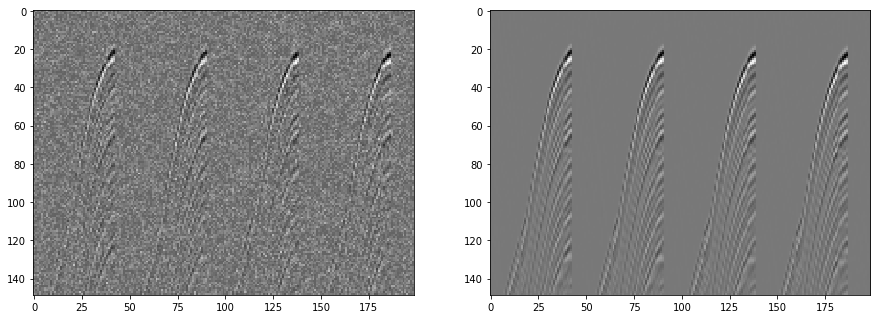

In [3]:
# load the input and target images
input_path = '../data/processed/seismics/'
X_input = np.load(input_path + 'slice1_noisy.npy')
X_target = np.load(input_path + 'slice1.npy')

# Display input and target
fig, axs = plt.subplots(ncols = 2, figsize = (15, 15))
plt.set_cmap('gray')
axs[0].imshow(X_input)
axs[1].imshow(X_target)

(15000, 50, 50)


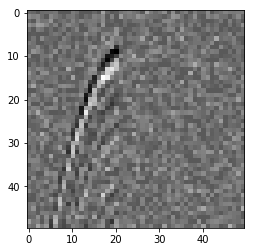

In [9]:
# Create the slice window with weights

# Window size
row_len = 50
col_len = 50

# Creating the input veec based on slices
img_rowlen = X_input.shape[0]
img_collen = X_input.shape[1]

img_weights = np.zeros((img_rowlen, img_collen))
X_input_vec = []
for i in range(img_rowlen - row_len + 1):
    for j in range(img_collen - col_len + 1):
        img_weights[i:i+row_len, j:j+col_len] += 1
        X_input_vec.append(X_input[i:i+row_len, j:j+col_len])
        
X_input_vec = np.asarray(X_input_vec)
print(X_input_vec.shape)
plt.imshow(X_input_vec[2020,:,:])


In [10]:
# Making dimensions compatible with the trained model
X_input_vec_1 = np.expand_dims(X_input_vec, axis = 3)

In [11]:
##  Load the saved model
from keras.models import model_from_json
json_file = open('trained_models/model_3_50_50_1_5/model_1.json')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
autoencoder.load_weights('trained_models/model_3_50_50_1_5/model_1.h5')

Using TensorFlow backend.


In [12]:
X_output_vec = autoencoder.predict(X_input_vec_1)

In [18]:
# Calculating the X_output image
X_output = np.zeros((img_rowlen, img_collen))
X_input_vec = []
count = 0
for i in range(img_rowlen - row_len + 1):
    for j in range(img_collen - col_len + 1):
        X_output[i:i+row_len, j:j+col_len] += X_output_vec[count, :, :, 0]
        count += 1
X_output /= img_weights
        


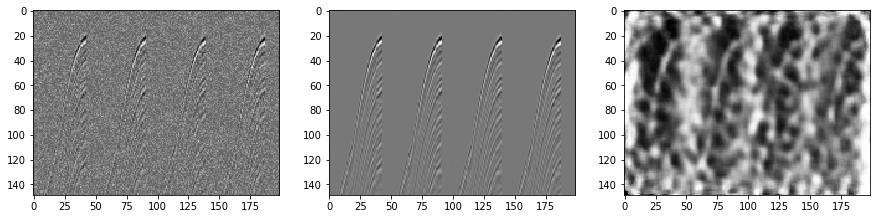

In [21]:
# Display input and target
fig, axs = plt.subplots(ncols = 3, figsize = (15, 15))
plt.set_cmap('gray')
axs[0].imshow(X_input)
axs[2].imshow(X_output)
axs[1].imshow(X_target)